In [2]:
%matplotlib inline

import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltools.stats import regress
from nltools.external import glover_hrf

## Contrasts

betas: [7.78781133 2.31354539]
mean(y): 7.787811325141379
mean(group1): 10.101356716482156
mean(group2): 5.474265933800603
mean(group1)-mean(group2): 4.627090782681553
mean(y)-(mean(group1)-mean(group2)): 3.160720542459826


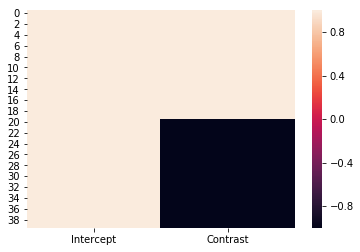

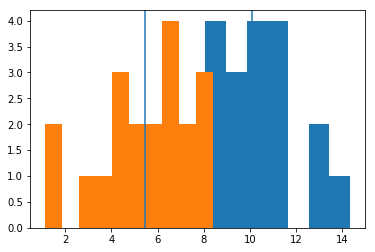

In [37]:
group1_params = {'n':20, 'mean':10, 'sd':2}
group2_params = {'n':20, 'mean':5, 'sd':2}
group1 = group1_params['mean'] + np.random.randn(group1_params['n']) * group1_params['sd']
group2 = group2_params['mean'] + np.random.randn(group2_params['n']) * group2_params['sd']

y = np.hstack([group1, group2])
x = pd.DataFrame({'Intercept':np.ones(len(y)), 'Contrast':np.hstack([np.ones(group1_params['n']), -1*np.ones(group2_params['n'])])})

sns.heatmap(x)

b, t, p, df, res = regress(x, y)
print(f"betas: {b}")
print(f"mean(y): {np.mean(y)}")
print(f"mean(group1): {np.mean(group1)}")
print(f"mean(group2): {np.mean(group2)}")
print(f"mean(group1)-mean(group2): {np.mean(group1)-np.mean(group2)}")
print(f"mean(y)-(mean(group1)-mean(group2)): {np.mean(y)-(np.mean(group1)-np.mean(group2))}")

# Create Plot
plt.figure()
plt.hist(group1)
plt.hist(group2)
plt.axvline(x=np.mean(group1))
plt.axvline(x=np.mean(group2))

## Dummy Codes

betas: [5.04143246 4.3515665 ]
mean(y): 7.217215709903388
mean(group1): 9.392998962308651
mean(group2): 5.041432457498124
mean(group1)-mean(group2): 4.351566504810527
mean(y)-(mean(group1)-mean(group2)): 2.8656492050928613


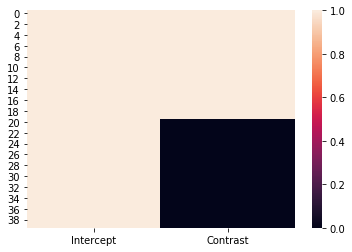

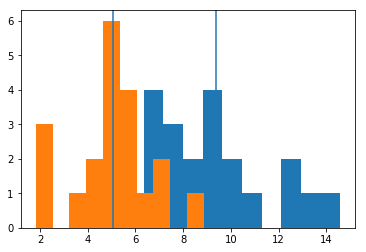

In [39]:
group1_params = {'n':20, 'mean':10, 'sd':2}
group2_params = {'n':20, 'mean':5, 'sd':2}
group1 = group1_params['mean'] + np.random.randn(group1_params['n']) * group1_params['sd']
group2 = group2_params['mean'] + np.random.randn(group2_params['n']) * group2_params['sd']

y = np.hstack([group1, group2])
x = pd.DataFrame({'Intercept':np.ones(len(y)), 'Contrast':np.hstack([np.ones(group1_params['n']), np.zeros(group2_params['n'])])})

sns.heatmap(x)
b, t, p, df, res = regress(x, y)
print(f"betas: {b}")
print(f"mean(y): {np.mean(y)}")
print(f"mean(group1): {np.mean(group1)}")
print(f"mean(group2): {np.mean(group2)}")
print(f"mean(group1)-mean(group2): {np.mean(group1)-np.mean(group2)}")
print(f"mean(y)-(mean(group1)-mean(group2)): {np.mean(y)-(np.mean(group1)-np.mean(group2))}")

# Create Plot
plt.figure()
plt.hist(group1)
plt.hist(group2)
plt.axvline(x=np.mean(group1))
plt.axvline(x=np.mean(group2))

(array([2., 0., 1., 2., 2., 5., 4., 0., 0., 4.]),
 array([0.18827468, 0.94434216, 1.70040964, 2.45647713, 3.21254461,
        3.9686121 , 4.72467958, 5.48074707, 6.23681455, 6.99288203,
        7.74894952]),
 <a list of 10 Patch objects>)

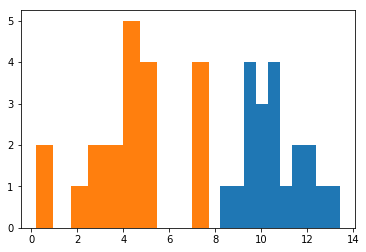

In [8]:
plt.hist(group1)
plt.hist(group2)